In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Carga y limpieza de datos

In [2]:
data_path = os.getcwd()+'/data/user_activity.csv'
df = pd.read_csv(data_path,sep=',', decimal=",", engine='python',index_col=False)

In [3]:
# Convertir 'date' a datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verificar fechas no válidas
print("Fechas no válidas:", df['date'].isna().sum())

# Verificar duplicados
print("Duplicados:", df.duplicated().sum())

# Validar tipos de datos
df.info()

# Vista rápida
df.head()

Fechas no válidas: 0
Duplicados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2192 non-null   int64         
 1   date               2192 non-null   datetime64[ns]
 2   lessons_completed  2192 non-null   int64         
 3   minutes_spent      2192 non-null   int64         
 4   quizzes_attempted  2192 non-null   int64         
 5   subscription_type  2192 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 102.9+ KB


,user_id,date,lessons_completed,minutes_spent,quizzes_attempted,subscription_type
0,1,2024-01-01,1,22,0,Gratuito
1,1,2024-01-03,3,9,0,Gratuito
2,1,2024-01-04,1,24,1,Gratuito
3,1,2024-01-05,0,26,0,Gratuito
4,1,2024-01-06,0,23,0,Gratuito


# 2. Análisis exploratorio


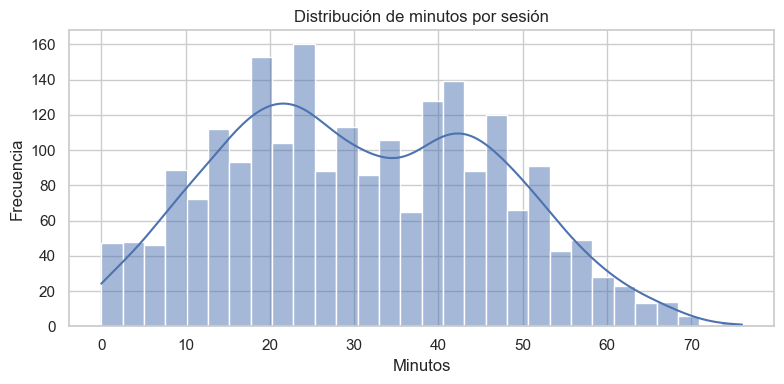

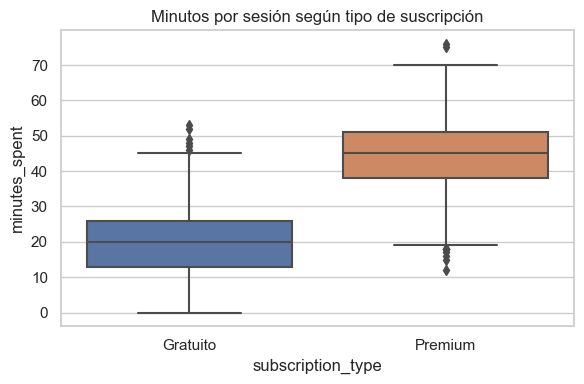

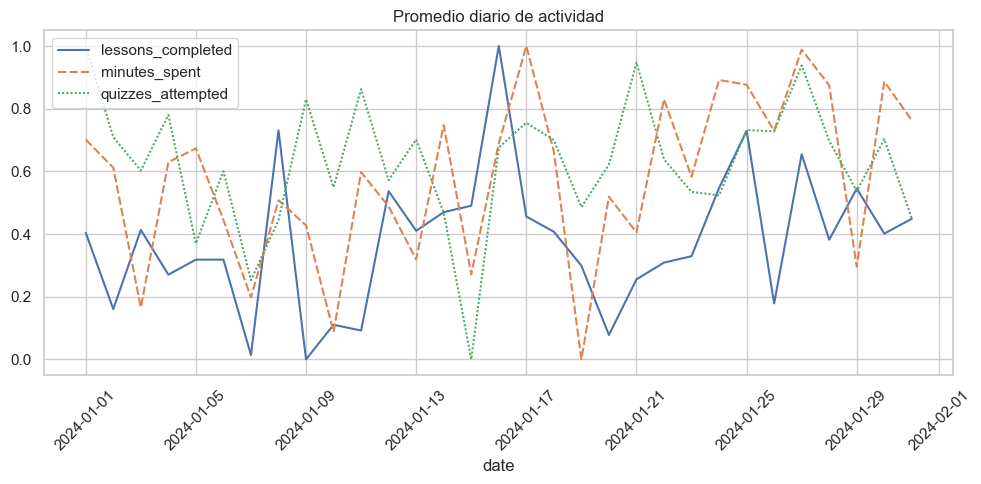

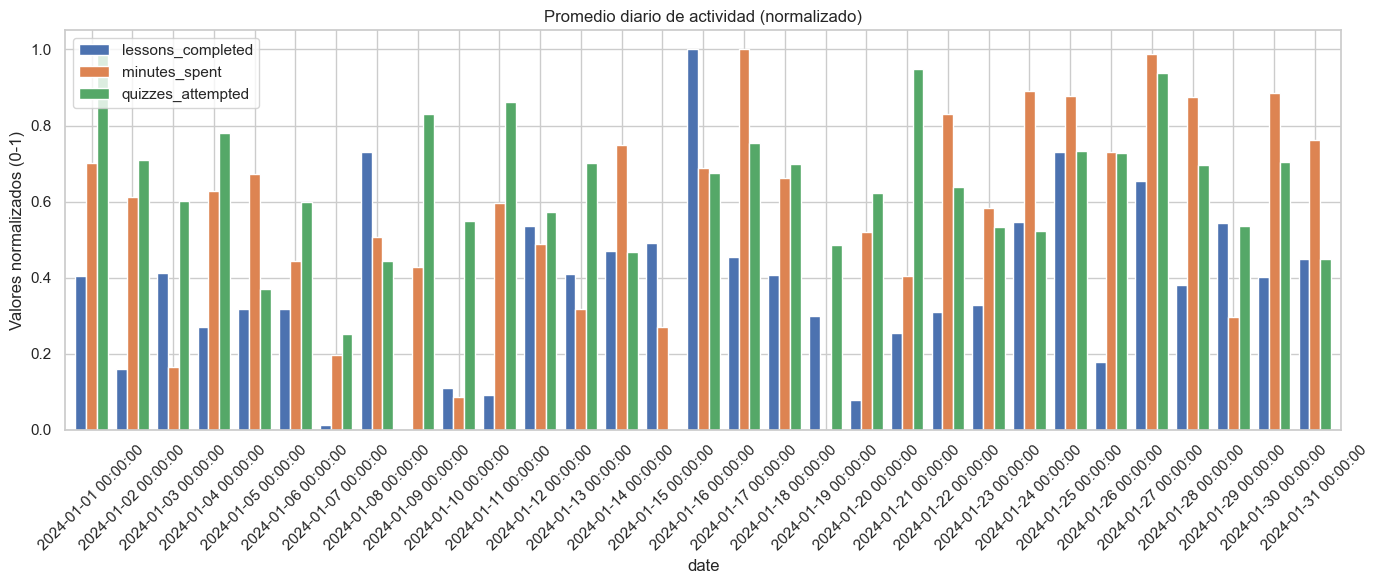

In [25]:
# Distribución de minutos por sesión
plt.figure(figsize=(8, 4))
sns.histplot(df["minutes_spent"], bins=30, kde=True)
plt.title("Distribución de minutos por sesión")
plt.xlabel("Minutos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Boxplot por tipo de suscripción
plt.figure(figsize=(6, 4))
sns.boxplot(x="subscription_type", y="minutes_spent", data=df)
plt.title("Minutos por sesión según tipo de suscripción")
plt.tight_layout()
plt.show()

# Promedio diario de actividad (línea)
daily_avg = df.groupby("date")[["lessons_completed", "minutes_spent", "quizzes_attempted"]].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_avg_normalized)
plt.title("Promedio diario de actividad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Promedio diario (barras normalizadas)
daily_avg_normalized = (daily_avg - daily_avg.min()) / (daily_avg.max() - daily_avg.min())
daily_avg_normalized.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("Promedio diario de actividad (normalizado)")
plt.ylabel("Valores normalizados (0-1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Transformaciones y agregaciones 

In [5]:
# Nuevas columnas: semana y día
df['week'] = df['date'].dt.isocalendar().week
df['weekday'] = df['date'].dt.day_name()

# Promedio semanal
weekly_avg = df.groupby('week')[['lessons_completed', 'minutes_spent', 'quizzes_attempted']].mean()
# Promedio por día de la semana
weekday_avg = df.groupby('weekday')[['lessons_completed', 'minutes_spent', 'quizzes_attempted']].mean()
.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Nueva métrica: minutos por lección

df['minutes_per_lesson'] = np.where(
    df['lessons_completed'] == 0,
    0,  # si completó 0 lecciones, asignar 0
    df['minutes_spent'] / df['lessons_completed']  # si no, hacer el cálculo normal
)

In [14]:
weekday_avg

,lessons_completed,minutes_spent,quizzes_attempted
weekday,,,
Monday,1.488166,30.452663,0.869822
Tuesday,1.405556,31.116667,0.955556
Wednesday,1.420330,30.793956,0.892857
Thursday,1.415493,31.436620,0.992958
Friday,1.379791,30.216028,0.871080
Saturday,1.400697,30.710801,0.965157
Sunday,1.341912,30.628676,0.897059


In [6]:
df.head()

,user_id,date,lessons_completed,minutes_spent,quizzes_attempted,subscription_type,week,weekday,minutes_per_lesson
0,1,2024-01-01,1,22,0,Gratuito,1,Monday,22.0
1,1,2024-01-03,3,9,0,Gratuito,1,Wednesday,3.0
2,1,2024-01-04,1,24,1,Gratuito,1,Thursday,24.0
3,1,2024-01-05,0,26,0,Gratuito,1,Friday,0.0
4,1,2024-01-06,0,23,0,Gratuito,1,Saturday,0.0


In [7]:
# Mostrar resultados
print("Promedio semanal:\n", weekly_avg.head())
print("\nPromedio por día de la semana:\n", weekday_avg)
print("\nNuevas variables:\n", df[['user_id', 'date', 'minutes_spent', 'lessons_completed', 'minutes_per_lesson']].head())

Promedio semanal:
       lessons_completed  minutes_spent  quizzes_attempted
week                                                     
1              1.337945      30.276680           0.911067
2              1.377282      30.054767           0.922921
3              1.442387      30.450617           0.909465
4              1.460123      32.167689           0.950920
5              1.467890      31.114679           0.885321

Promedio por día de la semana:
            lessons_completed  minutes_spent  quizzes_attempted
weekday                                                       
Monday              1.488166      30.452663           0.869822
Tuesday             1.405556      31.116667           0.955556
Wednesday           1.420330      30.793956           0.892857
Thursday            1.415493      31.436620           0.992958
Friday              1.379791      30.216028           0.871080
Saturday            1.400697      30.710801           0.965157
Sunday              1.341912      30.6

# 4. Visualizaciones

<Figure size 1000x500 with 0 Axes>

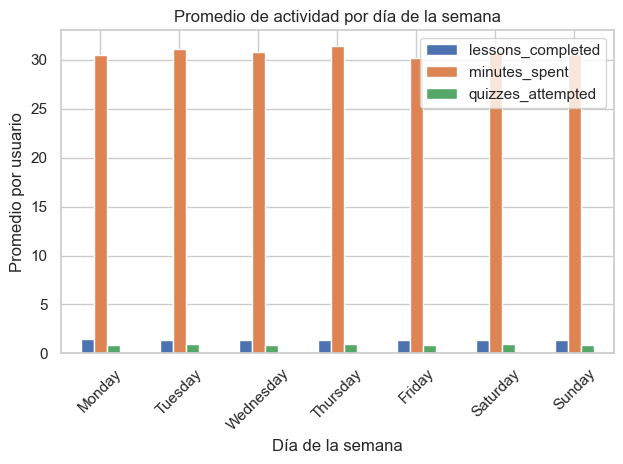

In [16]:
# Actividad por dia de la semana

plt.figure(figsize=(10, 5))
weekday_avg.plot(kind='bar')
plt.title("Promedio de actividad por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Promedio por usuario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

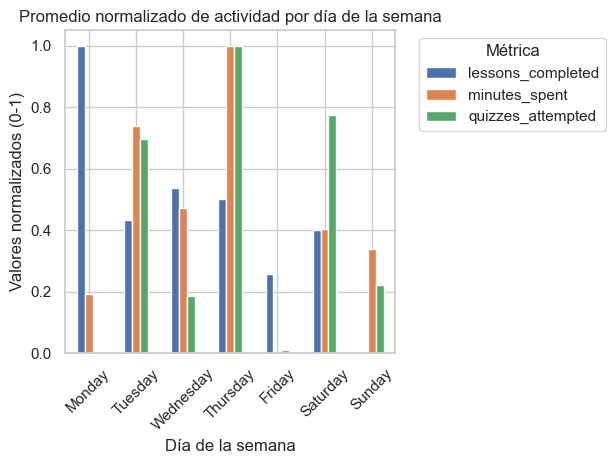

In [20]:
# Normalización min-max de las métricas por día de la semana
weekday_avg_normalized = (weekday_avg - weekday_avg.min()) / (weekday_avg.max() - weekday_avg.min())

# Gráfico de barras con datos normalizados
plt.figure(figsize=(10, 5))
weekday_avg_normalized.plot(kind='bar')
plt.title("Promedio normalizado de actividad por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Valores normalizados (0-1)")
plt.xticks(rotation=45)

# Mover la leyenda fuera del gráfico
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

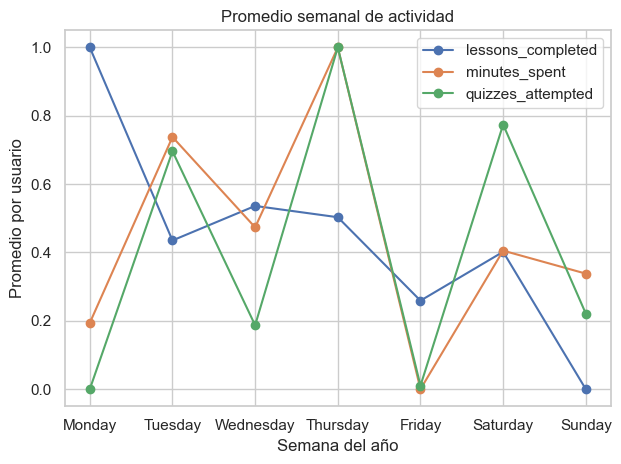

In [21]:
# actividad semanal
plt.figure(figsize=(10, 5))
weekday_avg_normalized.plot(marker='o')
plt.title("Promedio semanal de actividad")
plt.xlabel("Semana del año")
plt.ylabel("Promedio por usuario")
plt.tight_layout()
plt.show()


In [22]:
# Guardamos valores reales de referencia
min_val = weekday_avg["minutes_spent"].min()
max_val = weekday_avg["minutes_spent"].max()

# Tomamos un valor normalizado (por ejemplo el del lunes)
norm_val = weekday_avg_normalized.loc["Monday", "minutes_spent"]

# Desnormalizamos
original_val = norm_val * (max_val - min_val) + min_val

print(f"Valor normalizado: {norm_val:.2f}")
print(f"Equivalente en minutos reales: {original_val:.2f}")

Valor normalizado: 0.19
Equivalente en minutos reales: 30.45


In [24]:
# Unir los dos DataFrames
combined = pd.concat([
    weekday_avg.add_suffix('_real'),
    weekday_avg_normalized.add_suffix('_normalized')
], axis=1)

# Mostrar tabla resultante
display(combined)  # Usar print(combined) si no usas notebooks



,minutes_spent_real,minutes_spent_normalized_real,minutes_spent_desnormalized_real,lessons_completed_normalized,minutes_spent_normalized,quizzes_attempted_normalized
weekday,,,,,,
Monday,30.452663,0.193869,30.452663,1.000000,0.193869,0.000000
Tuesday,31.116667,0.737871,31.116667,0.435160,0.737871,0.696251
Wednesday,30.793956,0.473482,30.793956,0.536176,0.473482,0.187068
Thursday,31.436620,1.000000,31.436620,0.503106,1.000000,1.000000
Friday,30.216028,0.000000,30.216028,0.258996,0.000000,0.010214
Saturday,30.710801,0.405355,30.710801,0.401939,0.405355,0.774224
Sunday,30.628676,0.338073,30.628676,0.000000,0.338073,0.221190


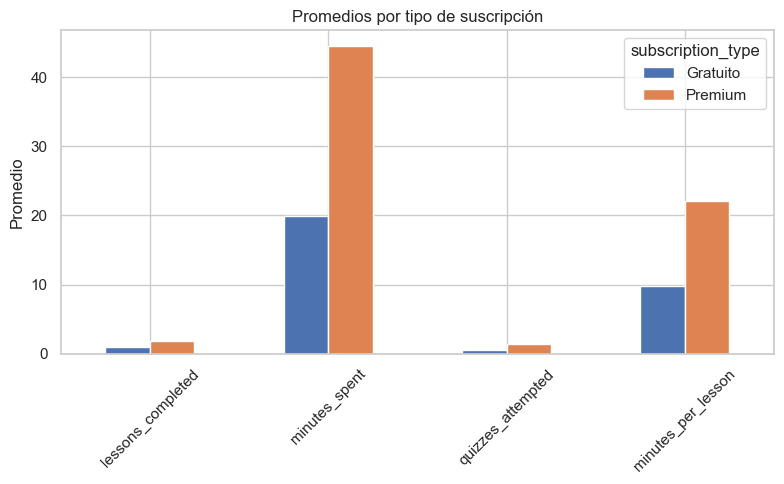

In [10]:
#Comparacion gratituo vs pago

subscription_avg = df.groupby("subscription_type")[["lessons_completed", "minutes_spent", "quizzes_attempted", "minutes_per_lesson"]].mean()
subscription_avg.T.plot(kind='bar', figsize=(8, 5))
plt.title("Promedios por tipo de suscripción")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


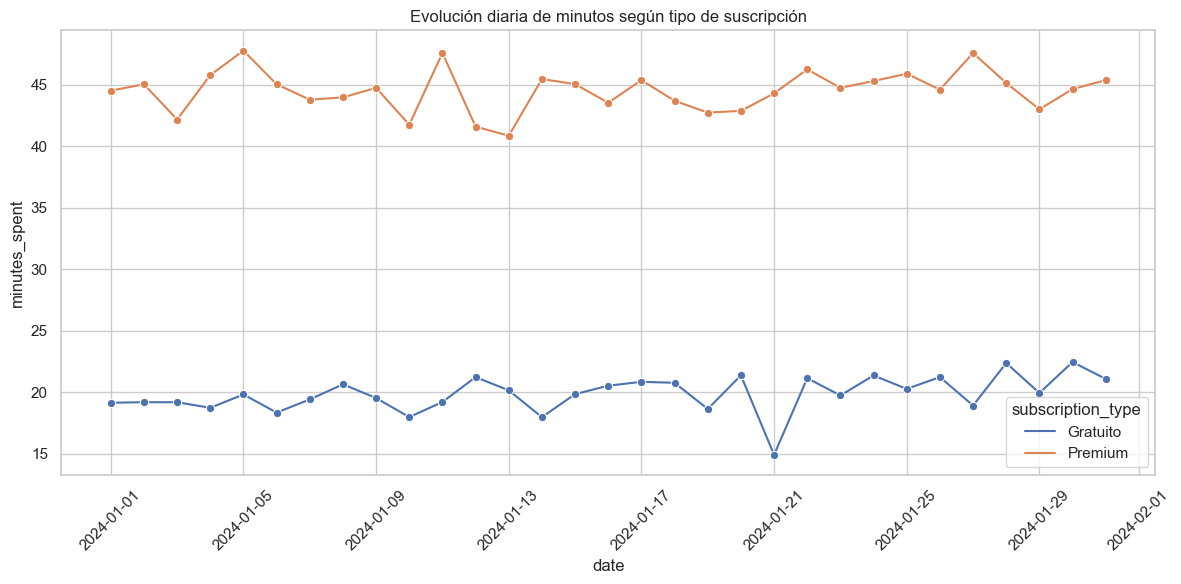

In [11]:
#Evolución por tipo de suscripción
evolution = df.groupby(["date", "subscription_type"])[["minutes_spent"]].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=evolution, x="date", y="minutes_spent", hue="subscription_type", marker="o")
plt.title("Evolución diaria de minutos según tipo de suscripción")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


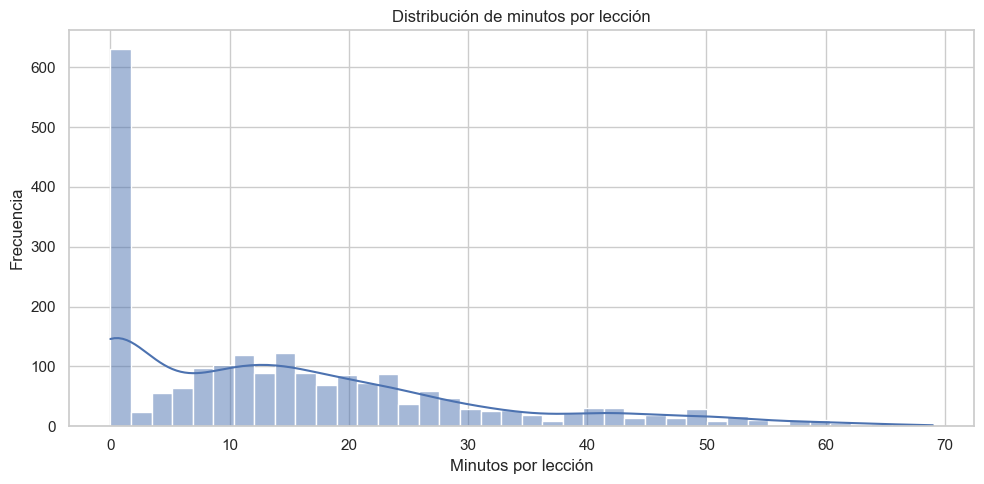

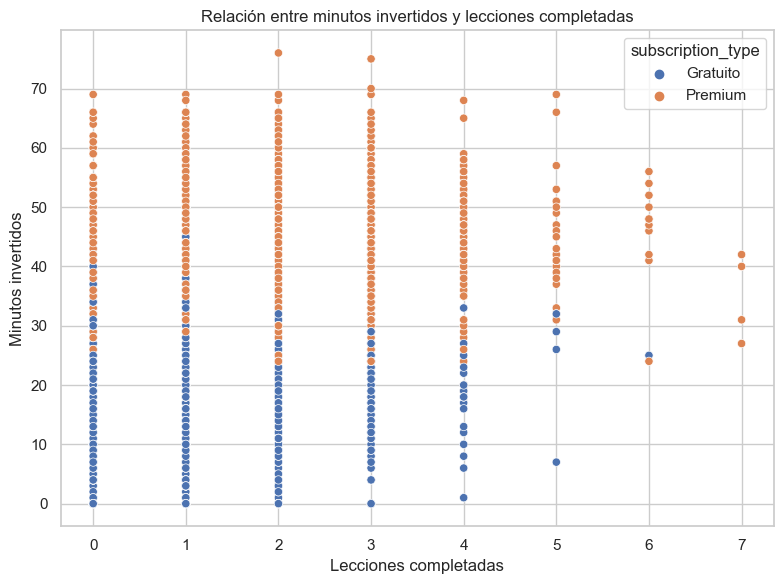

In [13]:
# Histograma de minutes_per_lesson
plt.figure(figsize=(10, 5))
sns.histplot(df['minutes_per_lesson'], bins=40, kde=True)
plt.title("Distribución de minutos por lección")
plt.xlabel("Minutos por lección")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Scatter: relación entre minutes_spent y lessons_completed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='lessons_completed', y='minutes_spent', hue='subscription_type')
plt.title("Relación entre minutos invertidos y lecciones completadas")
plt.xlabel("Lecciones completadas")
plt.ylabel("Minutos invertidos")
plt.tight_layout()
plt.show()


# Insights y recomendaciones

In [12]:
# Usuarios más activos
user_totals = df.groupby('user_id')[['lessons_completed', 'minutes_spent', 'quizzes_attempted']].sum()

# Top usuarios
print("Top usuarios por minutos:\n", user_totals.sort_values('minutes_spent', ascending=False).head(5))
print("\nTop usuarios por lecciones:\n", user_totals.sort_values('lessons_completed', ascending=False).head(5))
print("\nTop usuarios por quizzes:\n", user_totals.sort_values('quizzes_attempted', ascending=False).head(5))

# Segmentación de usuarios por nivel de uso
user_totals["usage_level"] = pd.qcut(user_totals["minutes_spent"], q=3, labels=["Bajo", "Medio", "Alto"])
print("\nUsuarios por nivel de uso:\n", user_totals["usage_level"].value_counts())

# Añadir segmentación al dataset original
df = df.merge(user_totals["usage_level"], on="user_id")


Top usuarios por minutos:
          lessons_completed  minutes_spent  quizzes_attempted
user_id                                                     
12                      52           1155                 39
26                      50           1153                 35
79                      48           1142                 50
34                      46           1134                 37
41                      39           1127                 38

Top usuarios por lecciones:
          lessons_completed  minutes_spent  quizzes_attempted
user_id                                                     
44                      60           1062                 43
46                      55            972                 26
12                      52           1155                 39
100                     50           1020                 36
26                      50           1153                 35

Top usuarios por quizzes:
          lessons_completed  minutes_spent  quizzes_attempted


In [26]:
user_totals

,lessons_completed,minutes_spent,quizzes_attempted,usage_level
user_id,,,,
1,17,335,6,Bajo
2,42,1094,24,Alto
3,25,529,14,Medio
4,18,414,10,Bajo
5,20,483,7,Medio
...,...,...,...,...
96,24,410,15,Bajo
97,25,436,12,Bajo
98,24,453,18,Bajo


In [27]:
df

,user_id,date,lessons_completed,minutes_spent,quizzes_attempted,subscription_type,week,weekday,minutes_per_lesson,usage_level
0,1,2024-01-01,1,22,0,Gratuito,1,Monday,22.0,Bajo
1,1,2024-01-03,3,9,0,Gratuito,1,Wednesday,3.0,Bajo
2,1,2024-01-04,1,24,1,Gratuito,1,Thursday,24.0,Bajo
3,1,2024-01-05,0,26,0,Gratuito,1,Friday,0.0,Bajo
4,1,2024-01-06,0,23,0,Gratuito,1,Saturday,0.0,Bajo
...,...,...,...,...,...,...,...,...,...,...
2187,100,2024-01-26,2,38,3,Premium,4,Friday,19.0,Alto
2188,100,2024-01-27,6,42,0,Premium,4,Saturday,7.0,Alto
2189,100,2024-01-28,1,49,1,Premium,4,Sunday,49.0,Alto
2190,100,2024-01-29,0,36,1,Premium,5,Monday,0.0,Alto


In [28]:
# Calcular totales por usuario
user_totals = df.groupby('user_id')[['minutes_spent', 'lessons_completed', 'quizzes_attempted']].sum()

# Agregar tipo de suscripción a user_totals (tomamos la más común para ese usuario)
subscription_map = df.groupby('user_id')['subscription_type'].agg(lambda x: x.mode()[0])
user_totals['subscription_type'] = subscription_map

# Segmentar en niveles de uso según minutos invertidos
user_totals['usage_level'] = pd.qcut(user_totals['minutes_spent'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Contar usuarios por nivel y tipo de suscripción
segment_counts = user_totals.groupby(['subscription_type', 'usage_level']).size().unstack()

print("Usuarios segmentados por tipo de suscripción y nivel de uso:\n")
print(segment_counts)

# (Opcional) Añadir segmentación al DataFrame original
df = df.merge(user_totals['usage_level'], on='user_id')

Usuarios segmentados por tipo de suscripción y nivel de uso:

usage_level        Bajo  Medio  Alto
subscription_type                   
Gratuito             34     22     0
Premium               0     11    33


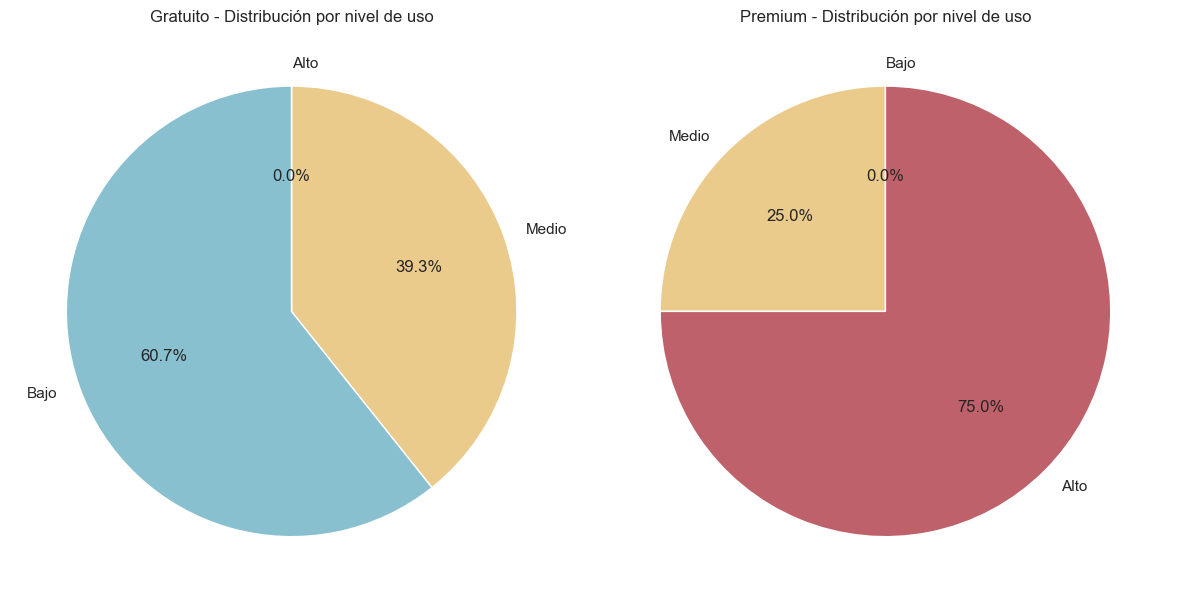

In [32]:
# Reagrupar y clasificar a los usuarios
user_totals = df.groupby('user_id')[['minutes_spent', 'lessons_completed', 'quizzes_attempted']].sum()

# Obtener tipo de suscripción por usuario (el más común en su historial)
user_totals['subscription_type'] = df.groupby('user_id')['subscription_type'].agg(lambda x: x.mode()[0])

# Clasificar a cada usuario por nivel de uso
user_totals['usage_level'] = pd.qcut(user_totals['minutes_spent'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Para cada tipo de suscripción, graficar un pie chart
for ax, sub_type in zip(axs, ['Gratuito', 'Premium']):
    data = user_totals[user_totals['subscription_type'] == sub_type]['usage_level'].value_counts().sort_index()
    ax.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#88c0d0", "#ebcb8b", "#bf616a"]
    )
    ax.set_title(f"{sub_type} - Distribución por nivel de uso")

plt.tight_layout()
plt.show()


In [34]:
user_totals = df.groupby('user_id')[['minutes_spent']].sum()

# Obtener los cortes (bins) usados por qcut
_, bins = pd.qcut(user_totals['minutes_spent'], q=3, labels=['Bajo', 'Medio', 'Alto'], retbins=True)

# Crear DataFrame con los rangos
usage_levels_df = pd.DataFrame({
    'Nivel de uso': ['Bajo', 'Medio', 'Alto'],
    'Minutos desde': [bins[0], bins[1], bins[2]],
    'Minutos hasta': [bins[1], bins[2], bins[3]]
})

# Mostrar tabla
print(usage_levels_df)

  Nivel de uso  Minutos desde  Minutos hasta
0         Bajo          254.0          453.0
1        Medio          453.0          879.0
2         Alto          879.0         1155.0


In [35]:
usage_levels_df

,Nivel de uso,Minutos desde,Minutos hasta
0,Bajo,254.0,453.0
1,Medio,453.0,879.0
2,Alto,879.0,1155.0
